## Importation des modules et lectures du fichier 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
labels=None
indiv=[]
varbs=None

In [2]:
keys=np.loadtxt("KeyboardData1.csv",dtype='str',delimiter=',')
labels = keys[1:,0]
keys=keys[:,1:] # On retire la premiere colonne
varbs=keys[0,:] #nom des variables
X=keys[1:,:].astype(float)

### on regarde un peu les données

In [3]:
print(varbs) #H = hold, UD = UpDown 
len(varbs)

['H.period' 'UD.period.t' 'H.t' 'UD.t.i' 'H.i' 'UD.i.e' 'H.e' 'UD.e.five'
 'H.five' 'UD.five.Shift.r' 'H.Shift.r' 'UD.Shift.r.o' 'H.o' 'UD.o.a'
 'H.a' 'UD.a.n' 'H.n' 'UD.n.l' 'H.l' 'UD.l.Return' 'H.Return']


21

In [4]:
print(labels)

['2' '2' '2' ... '57' '57' '57']


In [5]:
np.shape(X)

(19176, 21)

In [6]:
#Remarque : probablement pas besoin de faire de normalisation, mais à tester 
print(X)

[[0.1491 0.2488 0.1069 ... 0.1338 0.2171 0.0742]
 [0.1111 0.234  0.0694 ... 0.0839 0.1917 0.0747]
 [0.1328 0.0744 0.0731 ... 0.1085 0.1762 0.0945]
 ...
 [0.0939 0.025  0.1008 ... 0.1034 0.0983 0.0905]
 [0.0923 0.0371 0.0913 ... 0.0979 0.0938 0.0931]
 [0.0596 0.0714 0.0992 ... 0.0807 0.1186 0.1018]]


### ACP

In [7]:
def stdise(X):
  """Routine de standardisation
  """
  Xs=X.astype(float)
  mk=np.mean(Xs,axis=0)
  # Calcul de l'ecart-type avec max pour eviter une division par 0
  sk=np.maximum(np.std(Xs,axis=0),10*np.finfo(float).eps)
  Xs=np.add(Xs,-mk)
  Xs=np.multiply(Xs,1/sk)
  return Xs
# SVD. Axes Composantes
# Apres standardisation les colonnes sont de norme "nb de ligne" et non 1,
# on corrige cela, pour avoir de meilleures echelles.
Ps=stdise(X)/np.sqrt(np.shape(X)[0])
(U,D,VT) = np.linalg.svd(Ps,full_matrices=False)
V=VT.T

In [8]:
# Premieres composantes principales
C1 = D[0]*U[:,0]
C2 = D[1]*U[:,1]
C3 = D[2]*U[:,2]
# Axes principaux modifies pour le cercle des correlations
A1 = D[0]*V[:,0]
A2 = D[1]*V[:,1]

In [9]:
np.shape(C1)

(19176,)

## Tracés

Text(0, 0.5, 'C2')

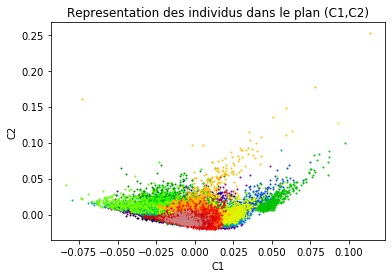

In [10]:
plt.close('all')
plt.figure()
plt.title('Representation des individus dans le plan (C1,C2)')
if labels is None:
  plt.scatter(C1,C2)
else:
  vlab=np.unique(labels)
  lv=len(vlab)
  cols=plt.cm.nipy_spectral(np.arange(lv)/lv)
  for i,vl in enumerate(vlab):
    l=labels==vl
    plt.scatter(C1[l],C2[l],s=1,label=vl,color=cols[i])
#for i,nm in enumerate(indiv): plt.text(C1[i],C2[i],nm)
plt.xlabel('C1')
plt.ylabel('C2')

Text(0, 0.5, 'C2')

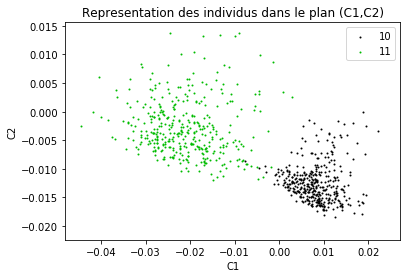

In [11]:
plt.close('all')
plt.figure()
plt.title('Representation des individus dans le plan (C1,C2)')
if labels is None:
  plt.scatter(C1,C2)
else:
  vlab=np.unique(labels)[:2]
  lv=len(vlab)
  cols=plt.cm.nipy_spectral(np.arange(lv)/lv)
  for i,vl in enumerate(vlab):
    l=labels==vl
    plt.scatter(C1[l],C2[l],s=1,label=vl,color=cols[i])
  plt.legend()
#for i,nm in enumerate(indiv): plt.text(C1[i],C2[i],nm)
plt.xlabel('C1')
plt.ylabel('C2')

In [12]:
a = np.array([1,2,3])
print(a==2)
print(a[[True,False,True]])

[False  True False]
[1 3]


Text(0.5, 1.0, 'Inerties en %')

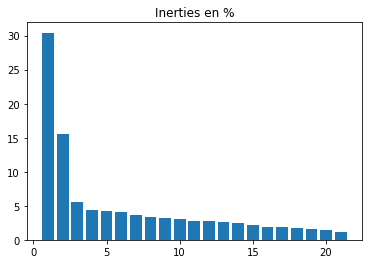

In [13]:
# Inerties
plt.figure() 
plt.bar(np.arange(np.shape(D)[0])+1,100*D**2/sum(D**2)) #inertie := carré des valeurs singulières
                                                        #100 * (D²/sum(D²)) 
plt.title('Inerties en %')

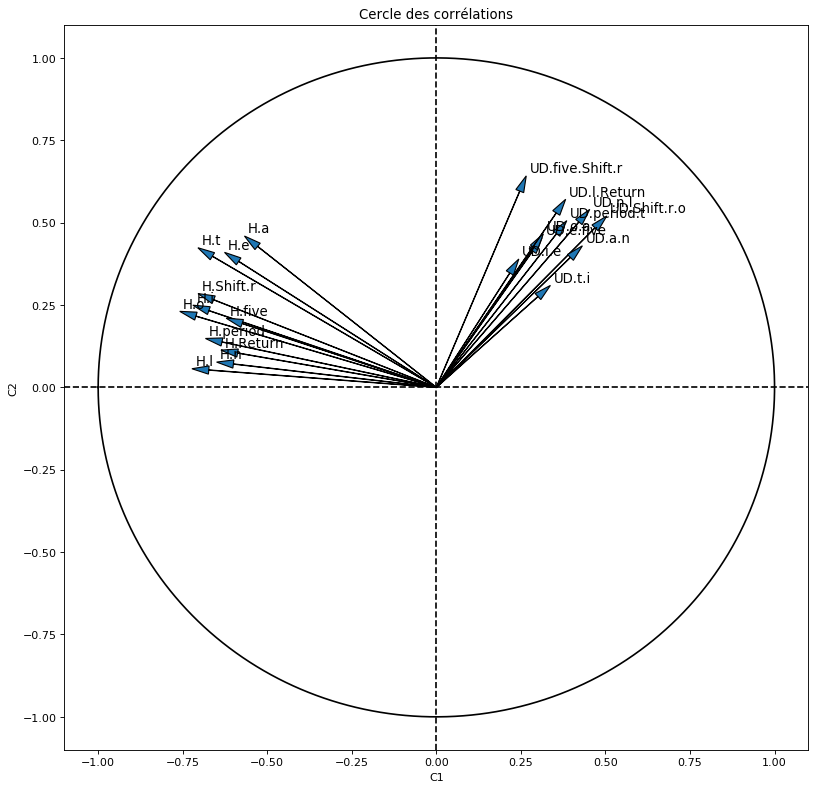

In [18]:
# Cercle des correlations
if not varbs is None:
  plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
  plt.title('Cercle des corrélations')
  Z = np.linspace(-np.pi, np.pi, 256,endpoint=True)
  C,S = np.cos(Z), np.sin(Z)
  plt.plot(C,S,c='black')
  plt.axvline(c='black',ls='dashed')
  plt.axhline(c='black',ls='dashed')
  for i, txt in enumerate(varbs):
    plt.arrow(0,0,A1[i],A2[i], length_includes_head=True,
            head_width=0.025, head_length=.05)
    plt.annotate(txt, (A1[i]+.01,A2[i]+.01),fontsize=12)
  plt.xlabel('C1')
  plt.ylabel('C2')